<a href="https://colab.research.google.com/github/atakishiyevamalak/MachineLearningProjects/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# from sklearn.datasets import fetch_openml

#mnist = fetch_openml('mnist_784', as_frame = False)      # --> dataFrame olmasin deye "as_frame = False" yaziriq

In [ ]:
from sklearn.datasets import fetch_openml

# Try fetching the dataset using its data ID instead of the name
mnist = fetch_openml(data_id=554, as_frame=False)
# data_id=554 corresponds to the MNIST dataset. on OpenML

In [ ]:
print(mnist.DESCR)

In [ ]:
X = mnist['data']
y = mnist['target']

In [ ]:
X[0]

In [ ]:
X[0].shape

In [ ]:
mnist.keys()

In [ ]:
# X,y = mnist['data'], mnist['target']
# X[0]

In [ ]:
X.shape

In [ ]:
print(X[0].reshape(28, 28))

In [ ]:
import matplotlib.pyplot as plt

def digit_image(num_image):
  num_image_reshaped = num_image.reshape(28, 28)
  plt.imshow(num_image_reshaped, cmap = 'binary')       # --> matrix'den shekil formatina qaytarmaq uchun .imshow() cmap 'binary' olanda ag/qara olur
  plt.axis('off')

some_digit = X[0]
digit_image(some_digit)     # plt.imread

In [ ]:
y[0]

In [ ]:
plt.figure(figsize= (12,7))
for idx, image in enumerate(X[:100]):       #--> 0-dan 100-e kimi butun sekilleri vizuallasdir
  plt.subplot(10,10, idx+1)                 # idx+1 yeni indexin uzerine bir gel ve hemin yere qoy sekli
  digit_image(image)
  # plt.title(y[idx])

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [ ]:
y_train

In [ ]:
y_train == '5'

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
# classifications types
#1. Binary classification - 2 class  deyere gore
#2. Multiclass classification - 3 clas ve ya daha cox olur
#3. Multilabel classification - bir nece
#4. Multioutput classification - giris deyere qeder cixis deyere olur

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score      #cross validation

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
sgd_clf.fit(X_train, y_train_5)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
t = [0.95035, 0.96035, 0.9604]
np.mean(t)

In [ ]:
sgd_clf.score(X_train, y_train_5)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
1- (sum(y_train == '5')/ len(y_train))

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))    # --> any baxir ki gorek burda True varmi hec

In [ ]:
dummy_clf.score(X_train, y_train_5)

In [ ]:
len(y_train_5) - sum(y_train_5)

In [ ]:
54579/60000

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 5)
preds

In [ ]:
from sklearn.metrics import confusion_matrix          # -->oz tapdigi ile real olani muqayise edir. TP,

cm = confusion_matrix(y_train_5, preds)
cm

In [ ]:
4505 / (4505 + 916)

In [ ]:
4505 / (4505 + 1464)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
precision_score(y_train_5, preds) * 100

In [ ]:
recall_score(y_train_5, preds) * 100

In [ ]:
f1_score(y_train_5, preds) * 100

In [ ]:
#import numpy as np
#import statistics as st

In [ ]:
#st.harmonic_mean([0.8310274857037447, 0.8310274857037447])

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
treshold = 0
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3, method = 'decision_function')
y_scores


In [ ]:
y_train_5

In [ ]:
sum((y_scores > 0) == y_train_5) / len(y_train_5)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, tresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
tresholds

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(tresholds, precisions[:-1], 'b--', label = 'Precision')
plt.plot(tresholds, recalls[:-1], 'g', label = 'Recall')

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel('Tresholds')
plt.legend(loc='center right')

In [ ]:
idx_for_90_precision = (precisions > 0.90).argmax()     # argmax --> max qiymetin indeksini göstərir
treshold_for_90_precison = tresholds[idx_for_90_precision]
treshold_for_90_precison

In [ ]:
idx_for_equal_precision = (precisions == recalls).argmax()
treshold_for_equals = tresholds[idx_for_equal_precision]
treshold_for_equals

In [ ]:
y_train_pred_90 = (y_scores > treshold_for_90_precison)
y_train_pred_90

In [ ]:
precision_score(y_train_5, y_train_pred_90)

In [ ]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(tresholds,precisions[:-1],'b--',label='Precision')
plt.plot(tresholds,recalls[:-1],'g-',label='Recall')

plt.axis([-50000,50000,0,1])
plt.grid()
plt.xlabel('Tresholds')
plt.axvline(treshold_for_90_precison,ymin=0,ymax=1,color='red',label='90% Precision line')
plt.legend(loc='center right')




In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

In [ ]:
plt.figure(figsize = (8, 7))
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1], 'k:', label = 'Random classifiers ROC curve')

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0,1,0,1])
plt.legend(loc='lower right',fontsize=13)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')    #faiz gosterir(solda deyil, sagda odut kimi gosterir)

In [ ]:
y_probas_forest[:2]   #---> ilk 2 t'xminini gosterir

In [ ]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, tresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

In [ ]:
plt.figure(figsize=(9, 7))

plt.plot(recalls_forest, precisions_forest, 'b-', linewidth=2,
         label='Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, label='SGD')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc='lower right')

In [ ]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5    #92 score yaxsi olma sebebini arasdir!!!
f1_score(y_train_5, y_train_pred_forest)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

In [ ]:
#MULTICLASS -

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

In [ ]:
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

In [ ]:
class_id = some_digit_scores.argmax()
class_id

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[class_id]

In [ ]:
svm_clf.decision_function_shape = 'ovo'
some_digit_scores_ovo = svm_clf.decision_function([some_digit])
some_digit_scores_ovo.round(2)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

In [ ]:
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit]).round()

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #

X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

In [83]:
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [ ]:
X_train

In [ ]:
plt.rc('font', size = 10)
ConfusionMatrixDisplay.from_predicitions(y_train, y_train_pred,
                                         normalize='true', values_format='.0%')
plt.show()

In [ ]:
#Multilabel classification

In [84]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train.astype('int8') >= 7)
y_train_odd = (y_train.astype('int8')%2 == 1)    # iki label yaratdiq
y_multilabel = np.c_[y_train_large, y_train_odd]  #np.c_ --> bu labelleri birlesdiririk c_ concate demekdi

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [85]:
pd.DataFrame(y_multilabel, columns=['is_greateer_than_seven?', 'is_odd'])

,is_greateer_than_seven?,is_odd
0,False,True
1,False,False
2,False,False
3,False,True
4,True,True
...,...,...
59995,True,False
59996,False,True
59997,False,True
59998,False,False


In [86]:
knn_clf.predict(X_train[:3])

array([[False,  True],
       [False, False],
       [False, False]])

In [87]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [88]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro') # --> makro onu deyir ki, hamsi ucun f1 score u tapir, ortalamasini cixarir

0.9764102655606048

In [92]:
import random
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [93]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

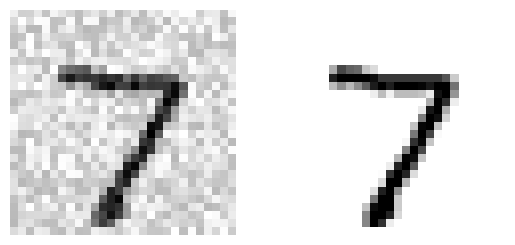

In [100]:
plt.subplot(121);
digit_image(X_test_mod[0])
plt.subplot(122);
digit_image(y_test_mod[0])
plt.show()

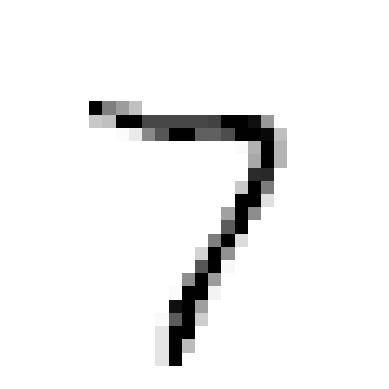

In [101]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train_mod, y_train_mod)
cleaned_pic = knn_clf.predict([X_test_mod[0]])

digit_image(cleaned_pic)

In [103]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5]
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3)
grid_search.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [107]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [108]:
grid_search.best_score_

np.float64(0.9397994088551026)

In [109]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [110]:
grid_search.best_estimator_.score(X_train, y_train)
turned_accuracy = grid_search.score(X_test, y_test)
turned_accuracy

0.9505